# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
from project_1 import Agent  # DQN Agent

In [6]:
import tensorflow as tf
print(tf.__version__)

1.7.1


In [7]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import seaborn as sns ;sns.set()
random.seed(0)

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [8]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [9]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces


Run the code cell below to print some information about the environment.

In [10]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


In [11]:
def run(num_episodes,agent,t_max):
    eps=1.0
    eps_decay  = 0.995
    eps_min = 0.01
    scores_window = deque(maxlen=100)
    scores =[]
    solved= False
    print("Agent lerning with State_size : {}  Action_size : {}  Gamma : {}  Update_schedule : {} \n DDQN :  {}".format(agent.state_size,agent.action_size,agent.gamma,agent.learn_schedule,agent.ddqn))
    for i in range(1,num_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]  # initital state for episode
        
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(t_max):
            action = int(agent.e_greedy(state,eps)) # e-greedy action selection
            
            env_info  = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            score += reward                                # update the score
            
            agent.store_exp(state,action,reward,next_state,done)
            score+=reward
            state = next_state
            if done:
                break
            
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_min, eps_decay*eps)
            
        
        print('\rEpisode {}\tAverage Score: {:.2f}   eps: {:.3f}'.format(i, np.mean(scores_window),eps), end="")
        if i % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and not solved:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))
            solved=True
    if agent.ddqn:
        torch.save(agent.qnet_local.state_dict(), 'Banana_ddqn.pth')
    else:
        torch.save(agent.qnet_local.state_dict(), 'Banana.pth')
           
 
    return scores
        

In [12]:
vanilla_agent = Agent(37,4,8,0.95) # agent
ddqn_agent= Agent(37,4,8,0.95,use_ddqn=True)  # ddqn agent

In [13]:
vanilla_scores = run(1000,vanilla_agent,1000)
print("\n\n")
ddqn_scores = run(1000,ddqn_agent,1000)

Agent lerning with State_size : 37  Action_size : 4  Gamma : 0.95  Update_schedule : 8 
 DDQN :  False
Episode 100	Average Score: 1.04   eps: 0.606
Episode 200	Average Score: 2.94   eps: 0.367
Episode 300	Average Score: 9.74   eps: 0.222
Episode 350	Average Score: 13.16   eps: 0.173
Environment solved in 350 episodes!	Average Score: 13.16
Episode 400	Average Score: 16.58   eps: 0.135
Episode 500	Average Score: 19.88   eps: 0.082
Episode 600	Average Score: 23.50   eps: 0.049
Episode 700	Average Score: 24.70   eps: 0.030
Episode 800	Average Score: 28.38   eps: 0.018
Episode 900	Average Score: 30.58   eps: 0.011
Episode 1000	Average Score: 30.02   eps: 0.010



Agent lerning with State_size : 37  Action_size : 4  Gamma : 0.95  Update_schedule : 8 
 DDQN :  True
Episode 100	Average Score: 0.02   eps: 0.606
Episode 200	Average Score: 3.30   eps: 0.3674
Episode 300	Average Score: 10.06   eps: 0.222
Episode 334	Average Score: 13.08   eps: 0.187
Environment solved in 334 episodes!	Average Scor

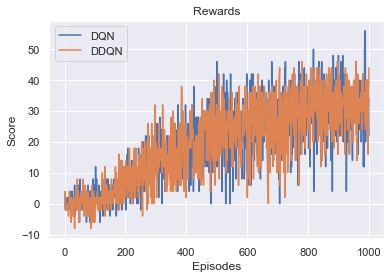

In [14]:
plt.title("Rewards")
plt.xlabel("Episodes")
plt.ylabel("Score")
sns.lineplot(data=np.array(vanilla_scores),legend="brief",label="DQN")
sns.lineplot(data=np.array(ddqn_scores),legend="brief",label="DDQN")
plt.savefig("plot.png")
plt.show()

In [20]:
def test_agent(agent):
    for i in range(5):
        env_info = env.reset(train_mode=False)[brain_name]
        state = env_info.vector_observations[0]
        score=0
        while True:
            action = int(agent.e_greedy(state))
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            score+=reward
            done = env_info.local_done[0]
            state = next_state
            if done:
                break
        print(score)

In [22]:
ddqn_agent.qnet_local.load_state_dict(torch.load('Banana_ddqn.pth'))
test_agent(ddqn_agent)

12.0
17.0
23.0
11.0
15.0


In [23]:
env.close()

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 